# **IMPORT PACKAGES**

In [ ]:
# Import libraries and packages

import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import json

! pip install geojson
import geojson

import folium
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import TimestampedGeoJson
import datetime

! pip install geopandas
import geopandas as gpd

! pip install plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

%matplotlib inline

! pip install catboost

! pip install optuna
import optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.3 MB/s 
     |████████████████████████████████| 6.3 MB 20.9 MB/s 
     |████████████████████████████████| 16.7 MB 211 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 11.9 MB/s 
     |████████████████████████████████| 210 kB 67.7 MB/s 
     |████████████████████████████████| 81 kB 10.7 MB/s 
     |████████████████████████████████| 78 kB 8.3 MB/s 
     |████████████████████████████████| 112 k

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import listings data, load as pandas dataframe
listings_data = pd.read_csv('/content/drive/MyDrive/USYD S1 2022/QBUS3820/Group Assignment/FINAL CODE/listings.csv')
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,20211207182240,2021-12-08,An Oasis in the City,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...",https://a0.muscache.com/pictures/2797669/17895...,40855,https://www.airbnb.com/users/show/40855,...,4.77,4.82,4.71,NaN,f,1,0,1,0,1.34
1,14250,https://www.airbnb.com/rooms/14250,20211207182240,2021-12-08,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Balgowlah Heights is one of the most prestigio...,https://a0.muscache.com/pictures/56935671/fdb8...,55948,https://www.airbnb.com/users/show/55948,...,4.33,4.67,4.33,Exempt,f,2,2,0,0,0.04
2,15253,https://www.airbnb.com/rooms/15253,20211207182240,2021-12-08,Unique Designer Rooftop Apartment in City Loca...,Penthouse living at it best ... You will be st...,The location is really central and there is nu...,https://a0.muscache.com/pictures/46dcb8a1-5d5b...,59850,https://www.airbnb.com/users/show/59850,...,4.67,4.70,4.47,PID-STRA-24061-7,t,1,0,1,0,3.21
3,44545,https://www.airbnb.com/rooms/44545,20211207182240,2021-12-08,Sunny Darlinghurst Warehouse Apartment,Sunny warehouse/loft apartment in the heart of...,Darlinghurst is home to some of Sydney's best ...,https://a0.muscache.com/pictures/a88d8e14-4f63...,112237,https://www.airbnb.com/users/show/112237,...,4.96,4.93,4.77,NaN,f,1,1,0,0,0.56
4,58506,https://www.airbnb.com/rooms/58506,20211207182240,2021-12-08,"Studio Yindi @ Mosman, Sydney","An open plan apartment, which opens onto a spa...","Mosman is a smart, middle to upper class subur...",https://a0.muscache.com/pictures/23497720/d30f...,279955,https://www.airbnb.com/users/show/279955,...,4.90,4.73,4.68,PID-STRA-6093,f,1,1,0,0,2.23


In [ ]:
# Dataset info
listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20880 entries, 0 to 20879
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20880 non-null  int64  
 1   listing_url                                   20880 non-null  object 
 2   scrape_id                                     20880 non-null  int64  
 3   last_scraped                                  20880 non-null  object 
 4   name                                          20873 non-null  object 
 5   description                                   20126 non-null  object 
 6   neighborhood_overview                         12589 non-null  object 
 7   picture_url                                   20880 non-null  object 
 8   host_id                                       20880 non-null  int64  
 9   host_url                                      20880 non-null 

# **DATA CLEANING**

In [ ]:
# Create dataframe listings with relevant columns
listings = listings_data[['id','neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates','price','host_since','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','instant_bookable','host_is_superhost','bathrooms_text','bedrooms','beds','amenities','number_of_reviews_ltm','first_review','last_review','calculated_host_listings_count','reviews_per_month','last_scraped']]
listings.head()

,id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,price,host_since,minimum_nights,...,bathrooms_text,bedrooms,beds,amenities,number_of_reviews_ltm,first_review,last_review,calculated_host_listings_count,reviews_per_month,last_scraped
0,11156,Sydney,-33.86767,151.22497,Private room in rental unit,Private room,1,$65.00,2009-09-23,90,...,1 shared bath,1.0,NaN,"[""Hot water"", ""Long term stays allowed"", ""Heat...",0,2009-12-05,2020-03-13,1,1.34,2021-12-08
1,14250,Manly,-33.80084,151.26378,Entire residential home,Entire home/apt,6,$470.00,2009-11-20,2,...,3 baths,3.0,3.0,"[""Hot water"", ""Coffee maker"", ""Heating"", ""Hair...",1,2016-01-02,2021-06-01,2,0.04,2021-12-08
2,15253,Sydney,-33.87964,151.21680,Private room in rental unit,Private room,2,$82.00,2009-12-03,2,...,1 private bath,1.0,1.0,"[""Hot water"", ""Coffee maker"", ""Long term stays...",18,2012-02-23,2021-12-03,1,3.21,2021-12-08
3,44545,Sydney,-33.87888,151.21439,Entire loft,Entire home/apt,2,$130.00,2010-04-22,90,...,1 bath,1.0,1.0,"[""Hot water"", ""Coffee maker"", ""Long term stays...",0,2010-10-20,2020-01-03,1,0.56,2021-12-08
4,58506,Mosman,-33.81748,151.23484,Entire guest suite,Entire home/apt,4,$150.00,2010-11-06,2,...,1 bath,1.0,1.0,"[""Hot water"", ""Coffee maker"", ""Long term stays...",15,2010-12-29,2021-11-30,1,2.23,2021-12-08


In [ ]:
# Dictionary for listings data
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20880 entries, 0 to 20879
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20880 non-null  int64  
 1   neighbourhood_cleansed          20880 non-null  object 
 2   latitude                        20880 non-null  float64
 3   longitude                       20880 non-null  float64
 4   property_type                   20880 non-null  object 
 5   room_type                       20880 non-null  object 
 6   accommodates                    20880 non-null  int64  
 7   price                           20880 non-null  object 
 8   host_since                      20877 non-null  object 
 9   minimum_nights                  20880 non-null  int64  
 10  maximum_nights                  20880 non-null  int64  
 11  number_of_reviews               20880 non-null  int64  
 12  review_scores_rating            

In [ ]:
# Price is in string format with '$'' and ','' Remove and convert to float
listings.price = listings.price.replace('[\$,]', '', regex=True).astype(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
# Convert string to datetime
listings['host_since'] = pd.to_datetime(listings['host_since'])
listings['first_review'] = pd.to_datetime(listings['first_review'])
listings['last_review'] = pd.to_datetime(listings['last_review'])
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# Create a 'listing_duration' column to indicate the duration of listing
listings['listing_duration'] = listings['last_review'] - listings['first_review']
listings['listing_duration'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0   3751 days
1   1977 days
2   3571 days
3   3362 days
4   3989 days
Name: listing_duration, dtype: timedelta64[ns]

In [ ]:
# Create 'hosting_duration' column to indicate hosts' experience
listings['hosting_duration'] = listings['last_scraped'] - listings['host_since']
listings['hosting_duration'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0   4459 days
1   4401 days
2   4388 days
3   4248 days
4   4050 days
Name: hosting_duration, dtype: timedelta64[ns]

In [ ]:
# Remove 'first_review' and 'last_review' column since they are no longer needed
listings = listings.drop(["first_review","last_review",'last_scraped'], axis=1)

In [ ]:
# Inspect null values
listings.isnull().sum().sort_values(ascending=False)

review_scores_rating              5809
listing_duration                  5809
reviews_per_month                 5809
bedrooms                          1436
beds                               904
bathrooms_text                      24
host_since                           3
host_is_superhost                    3
hosting_duration                     3
minimum_nights                       0
maximum_nights                       0
number_of_reviews                    0
neighbourhood_cleansed               0
instant_bookable                     0
price                                0
accommodates                         0
room_type                            0
property_type                        0
amenities                            0
number_of_reviews_ltm                0
calculated_host_listings_count       0
longitude                            0
latitude                             0
id                                   0
dtype: int64

In [ ]:
# Fill null values of 'bedrooms'
listings['bedrooms']=listings['bedrooms'].fillna(listings['beds']) # Assume each bedroom has one bed

# Fill the remaining missing values with the average number of bedrooms across all listings
listings['bedrooms']=listings['bedrooms'].fillna(listings['bedrooms'].median()) 

# Drop 'beds' column since it's no longer useful
listings = listings.drop(['beds'],axis=1)

In [ ]:
# Change bathroom_text to float
listings['bathrooms_text'] = listings['bathrooms_text'].str.extract('(\d+)').astype(float)

# Re-name 'bathroom_text' into 'bathrooms'
listings = listings.rename(columns= {'bathrooms_text':'bathrooms'})

# Fill the remaining missing values with the average number of bathrooms across all listings
listings['bathrooms']=listings['bathrooms'].fillna(listings['bathrooms'].median())

In [ ]:
# Split amenities column and count words, create a new column "amenities_count"
listings['amenities_count'] = listings['amenities'].str.split(',').str.len()

# Clean 'amenities'
listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "").str.replace('[',"").str.replace(']',"")

# Change column name
listings = listings.rename({'neighbourhood_cleansed': 'neighbourhood'}, axis=1)

listings['amenities'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


0    Hot water, Long term stays allowed, Heating, E...
1    Hot water, Coffee maker, Heating, Hair dryer, ...
2    Hot water, Coffee maker, Long term stays allow...
3    Hot water, Coffee maker, Long term stays allow...
4    Hot water, Coffee maker, Long term stays allow...
Name: amenities, dtype: object

In [ ]:
# Re-check null values
listings.isnull().sum().sort_values(ascending=False)

review_scores_rating              5809
listing_duration                  5809
reviews_per_month                 5809
hosting_duration                     3
host_since                           3
host_is_superhost                    3
instant_bookable                     0
calculated_host_listings_count       0
number_of_reviews_ltm                0
amenities                            0
bedrooms                             0
bathrooms                            0
id                                   0
neighbourhood                        0
number_of_reviews                    0
maximum_nights                       0
minimum_nights                       0
price                                0
accommodates                         0
room_type                            0
property_type                        0
longitude                            0
latitude                             0
amenities_count                      0
dtype: int64

In [ ]:
# Fill null values with median
listings['hosting_duration']=listings['hosting_duration'].fillna(listings['hosting_duration'].median())
listings['review_scores_rating']=listings['review_scores_rating'].fillna(listings['review_scores_rating'].median())
listings['listing_duration']=listings['listing_duration'].fillna(listings['listing_duration'].median())
listings['reviews_per_month']=listings['reviews_per_month'].fillna(listings['reviews_per_month'].median())

# Fill missing values with zero
listings['host_is_superhost']=listings['host_is_superhost'].fillna(0)

# Remove columns with missing values with mode
listings['host_since']=listings['host_since'].fillna(listings['host_since'].mode())

# Re-check null values
listings.isnull().sum().sort_values(ascending=False)

host_since                        3
id                                0
instant_bookable                  0
hosting_duration                  0
listing_duration                  0
reviews_per_month                 0
calculated_host_listings_count    0
number_of_reviews_ltm             0
amenities                         0
bedrooms                          0
bathrooms                         0
host_is_superhost                 0
review_scores_rating              0
neighbourhood                     0
number_of_reviews                 0
maximum_nights                    0
minimum_nights                    0
price                             0
accommodates                      0
room_type                         0
property_type                     0
longitude                         0
latitude                          0
amenities_count                   0
dtype: int64

In [ ]:
# Check types of data
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20880 entries, 0 to 20879
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   id                              20880 non-null  int64          
 1   neighbourhood                   20880 non-null  object         
 2   latitude                        20880 non-null  float64        
 3   longitude                       20880 non-null  float64        
 4   property_type                   20880 non-null  object         
 5   room_type                       20880 non-null  object         
 6   accommodates                    20880 non-null  int64          
 7   price                           20880 non-null  float64        
 8   host_since                      20877 non-null  datetime64[ns] 
 9   minimum_nights                  20880 non-null  int64          
 10  maximum_nights                  20880 non-null  int64     

In [ ]:
# Change timedelta to float
listings['listing_duration'] = listings['listing_duration'] / pd.to_timedelta(1, unit='D')
listings['hosting_duration'] = listings['hosting_duration'] / pd.to_timedelta(1, unit='D')

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20880 entries, 0 to 20879
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              20880 non-null  int64         
 1   neighbourhood                   20880 non-null  object        
 2   latitude                        20880 non-null  float64       
 3   longitude                       20880 non-null  float64       
 4   property_type                   20880 non-null  object        
 5   room_type                       20880 non-null  object        
 6   accommodates                    20880 non-null  int64         
 7   price                           20880 non-null  float64       
 8   host_since                      20877 non-null  datetime64[ns]
 9   minimum_nights                  20880 non-null  int64         
 10  maximum_nights                  20880 non-null  int64         
 11  nu

# **EDA**

In [ ]:
# Summary statistics
listings.describe().round(2)

,id,latitude,longitude,accommodates,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,bathrooms,bedrooms,number_of_reviews_ltm,calculated_host_listings_count,reviews_per_month,listing_duration,hosting_duration,amenities_count
count,20880.00,20880.00,20880.00,20880.00,20880.00,20880.00,20880.00,20880.00,20880.00,20880.00,20880.00,20880.00,20880.00,20880.00,20880.00,20880.00,20880.00
mean,27202395.07,-33.86,151.20,3.38,251.17,62.19,905.05,17.90,4.57,1.32,1.67,2.88,8.09,0.52,479.93,2082.44,22.99
std,14745864.03,0.08,0.09,2.19,498.60,52.74,407.08,42.99,0.90,0.66,1.02,9.41,25.19,0.95,584.94,842.41,12.41
min,11156.00,-34.10,150.63,1.00,13.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.01,0.00,9.00,1.00
25%,14905121.25,-33.90,151.17,2.00,80.00,4.00,1125.00,0.00,4.67,1.00,1.00,0.00,1.00,0.09,70.00,1470.00,13.00
50%,26883106.50,-33.88,151.21,2.00,140.00,90.00,1125.00,2.00,4.81,1.00,1.00,0.00,1.00,0.20,289.00,2166.00,20.00
75%,40238118.75,-33.82,151.26,4.00,250.00,90.00,1125.00,13.00,4.94,1.00,2.00,1.00,3.00,0.47,616.00,2674.00,31.00
max,53709998.00,-33.39,151.34,16.00,28613.00,1125.00,1500.00,881.00,5.00,19.00,18.00,565.00,197.00,44.49,3989.00,4558.00,85.00


In [ ]:
# Set of continuous variables
continuous_var = listings[['id','latitude','accommodates','price','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating',
                           'bathrooms','bedrooms','number_of_reviews_ltm','calculated_host_listings_count','reviews_per_month',
                           'listing_duration','hosting_duration','amenities_count']]

Text(0.5, 1.0, 'Correlation matrix of Continuous variables')

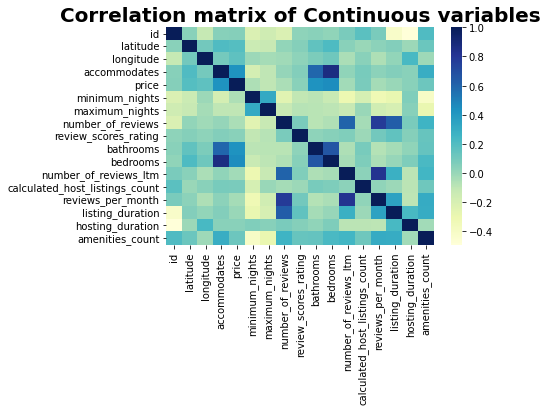

In [ ]:
# Heatmap pairwise correlation matrix
heat_map = sns.heatmap(listings.corr(),cmap="YlGnBu")
heat_map.set_title('Correlation matrix of Continuous variables', fontweight='bold', fontsize=20)

In [ ]:
# Most correlated variables with 'price'
corr_new = listings.corr().round(2)
corr_new['price'].sort_values(ascending=False)

price                             1.00
bedrooms                          0.45
accommodates                      0.43
bathrooms                         0.43
latitude                          0.19
longitude                         0.16
amenities_count                   0.12
calculated_host_listings_count    0.08
id                                0.05
hosting_duration                  0.04
review_scores_rating              0.04
listing_duration                 -0.00
number_of_reviews_ltm            -0.02
reviews_per_month                -0.03
number_of_reviews                -0.04
minimum_nights                   -0.05
maximum_nights                   -0.10
Name: price, dtype: float64

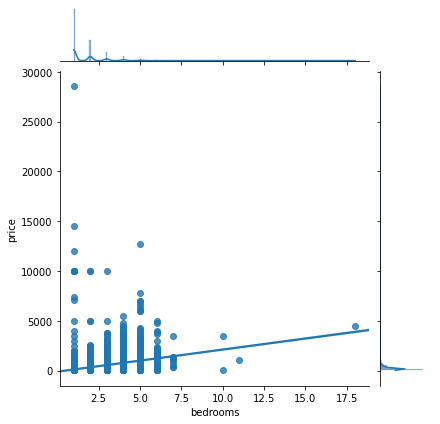

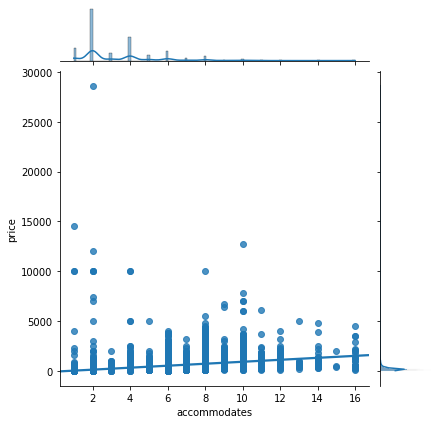

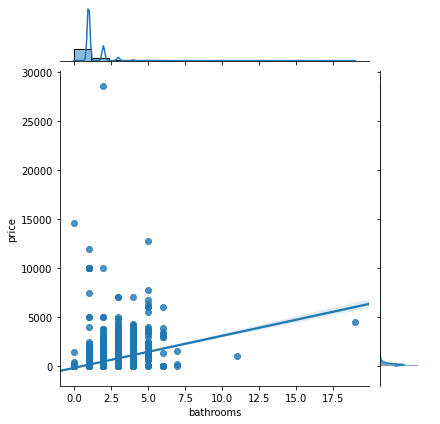

In [ ]:
# Pairwise correlation plot of the top most correlated variables with price

# Price vs. bedrooms
sns.jointplot(x='bedrooms',y='price', data=listings, kind="reg", truncate=False)

# Price vs. accommodates
sns.jointplot(x='accommodates',y='price', data=listings, kind="reg", truncate=False)

# Price vs. bathrooms
sns.jointplot(x='bathrooms',y='price', data=listings, kind="reg", truncate=False)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


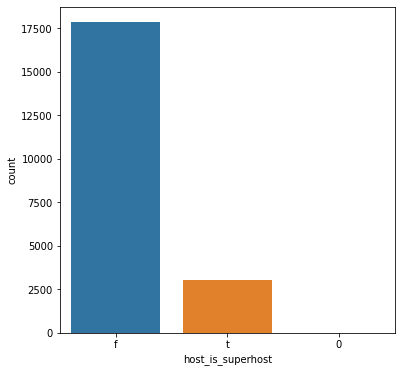

In [ ]:
# Inspect categorical variables - 'host_is_superhost'
fig = plt.figure(figsize = (6,6))
sns.countplot(listings['host_is_superhost'])

In [ ]:
# Coefficient of Variation (CV)

print('price_CV:', np.std(listings['price'])/np.mean(listings['price'])) 
print('bedrooms_CV:', np.std(listings['bedrooms'])/np.mean(listings['bedrooms'])) 
print('bathrooms:', np.std(listings['bathrooms'])/np.mean(listings['bathrooms'])) 
print('accommodates_cv:', np.std(listings['accommodates'])/np.mean(listings['accommodates'])) 
print('review_scores_rating_CV:', np.std(listings['review_scores_rating'])/np.mean(listings['review_scores_rating'])) 

price_CV: 1.9850879447942191
bedrooms_CV: 0.6085173032692284
bathrooms: 0.5007744542756484
accommodates_cv: 0.6467191011803753
review_scores_rating_CV: 0.1982125478254406


In [ ]:
# Create a series to group listings by year and convert to a dataframe
result = listings.groupby(listings['host_since'].map(lambda x: x.year)).id.count()
year = pd.DataFrame(result)

In [ ]:
# Rename column id to listings and reset index
year.rename(columns={'id':'listings'}, inplace=True)
year = pd.DataFrame(year).reset_index()

In [ ]:
# Create a new column with the cumulative listings by year
year['total listings']= year['listings'].cumsum(axis=0)

In [ ]:
# Convert host_since data type to int
year['host_since'] = year['host_since'].astype(int)

In [ ]:
# Rename column host_since to year
year.rename(columns={'host_since':'year'}, inplace=True)

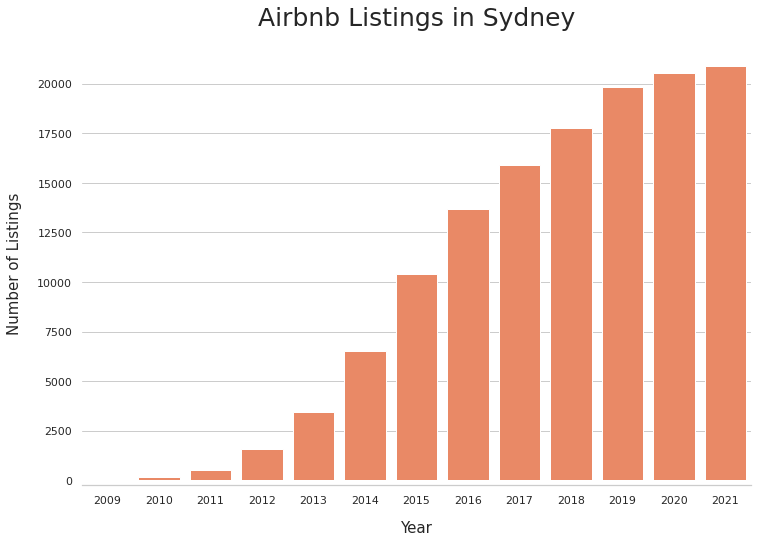

In [ ]:
# Plot Airbnb listings over time
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.barplot(x="year", y="total listings", data=year, color='Coral')
ax.set_title('Airbnb Listings in Sydney',fontsize=25,pad=20) # Give the plot a main title
ax.set_xlabel('Year',fontsize=15, labelpad=15) # Set text for the x axis,
ax.set_ylabel('Number of Listings',fontsize=15, labelpad=15)# Set text for y axis  
sns.despine(offset=5, left=True)

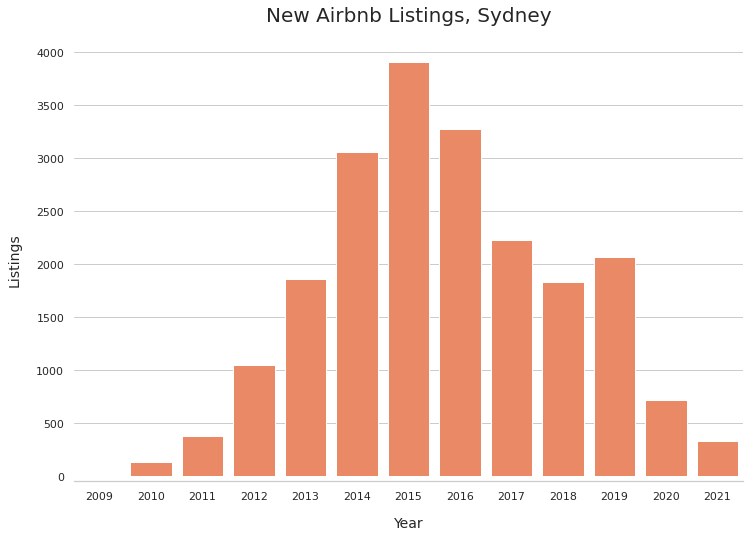

In [ ]:
# Plot new Airbnb listings over time
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.barplot(x='year', y="listings", data=year, color="coral")
ax.set_title('New Airbnb Listings, Sydney',fontsize=20,pad=20) # Give the plot a main title
ax.set_xlabel('Year',fontsize=14, labelpad=15) # Set text for the x axis,
ax.set_ylabel('Listings',fontsize=14, labelpad=15)# Set text for y axis  
sns.despine(offset=5, left=True)

# **DATA MINING**

In [ ]:
# Pie chart of Room type
fig = px.pie(listings['room_type'], names='room_type', 
             title='Percentages of Sydney Airbnb listings by Room Type')
fig.update_traces(textinfo='percent+value+label',insidetextorientation='radial')
fig.update_layout(width = 800, height = 600, uniformtext_minsize=12,title_x=0.5)
fig.show()

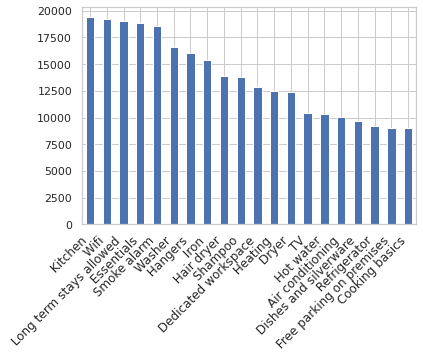

In [ ]:
# Top 20 most common amenities preferences by count
pd.Series(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(20)\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

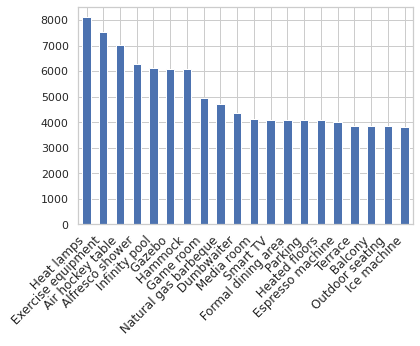

In [ ]:
# Amenities vs. Top 20 most expensive listings
amenities = np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))
amenity_prices = [(amn, listings[listings['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])
amenity_srs.sort_values(ascending=False)[:20].plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12) 
plt.show();

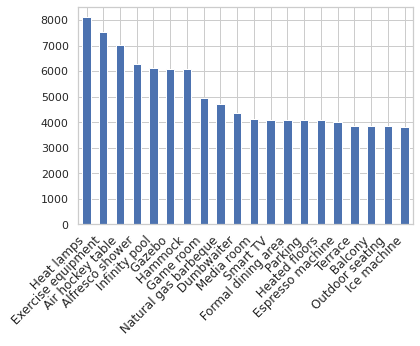

In [ ]:
# Amenities that contribute to top review_scores_rating
amenities = np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))
amenity_ratings = [(amn, listings[listings['amenities'].map(lambda amns: amn in amns)]['review_scores_rating'].mean()) for amn in amenities if amn != ""]
amenity_ratings_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])
amenity_ratings_srs.sort_values(ascending=False)[:20].plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12) 
plt.show();

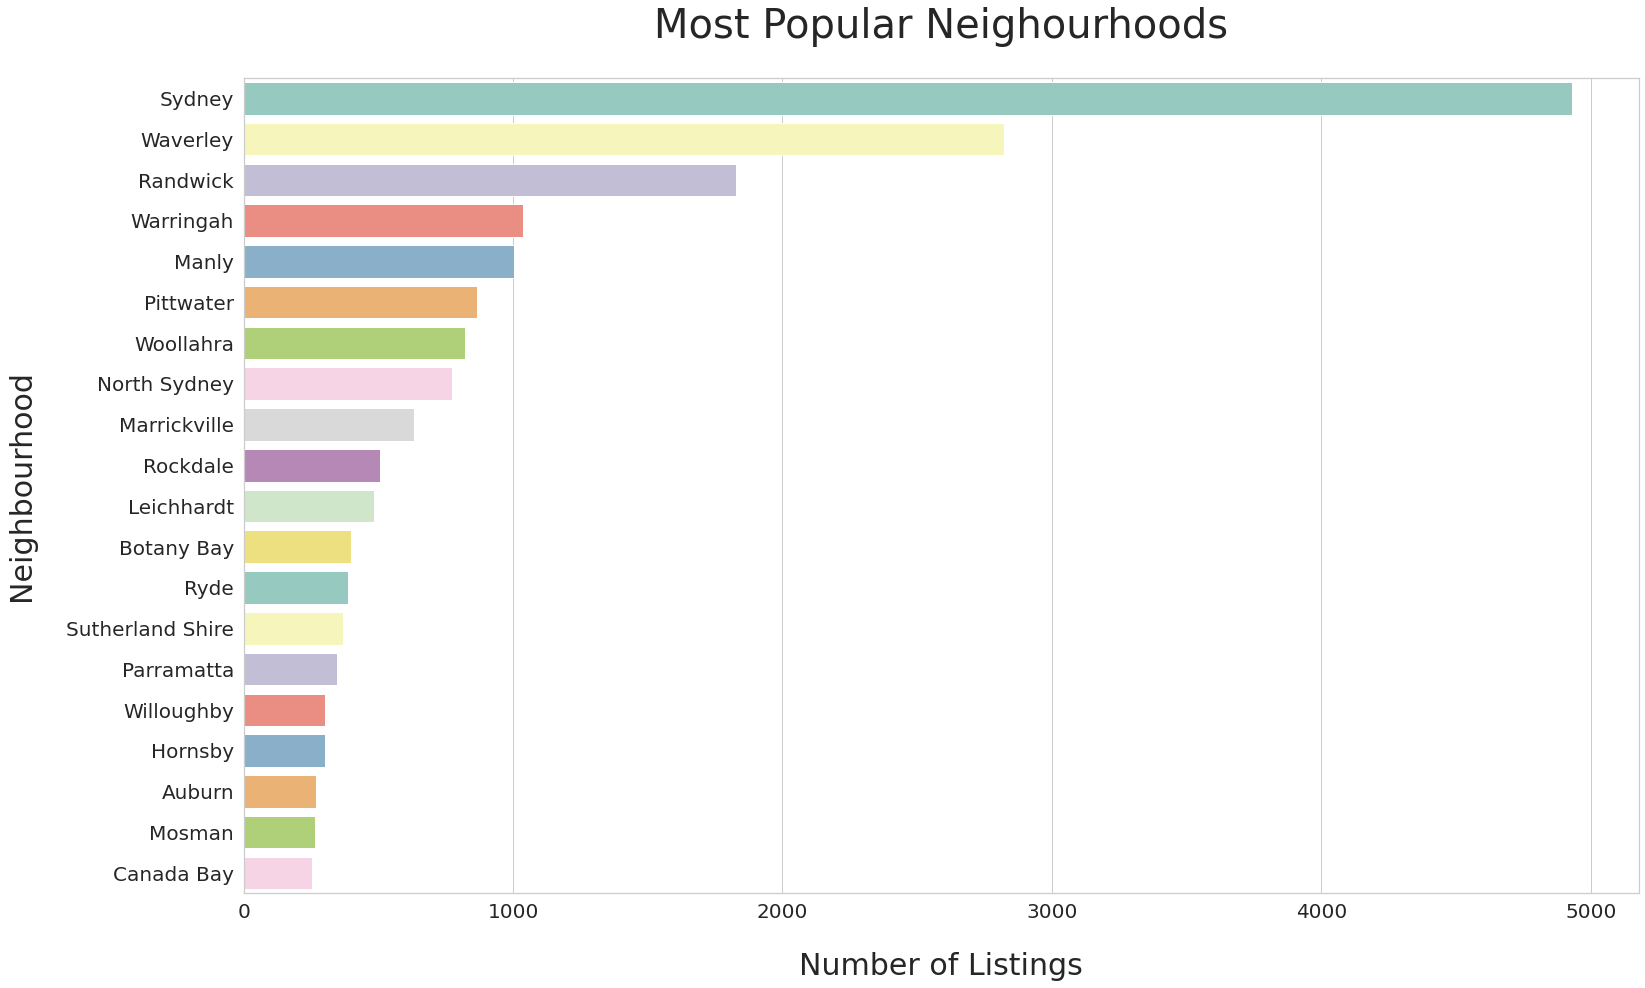

In [ ]:
# Plot top 20 neighbourhoods in terms listings
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
ax.axes.set_title("Most Popular Neighourhoods",fontsize=40,pad=40)
ax = sns.countplot(y='neighbourhood',data=listings, order = listings['neighbourhood'].value_counts().iloc[:20].index, palette="Set3")
ax.set_xlabel('Number of Listings',fontsize=30,labelpad=30)
ax.set_ylabel('Neighbourhood',fontsize=30,labelpad=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

In [ ]:
# Create a list of top 20 neighbourhoords in terms of listings
top = listings['neighbourhood'].value_counts().iloc[:20].index.tolist()

In [ ]:
# Create a dataframe to group neighbourhoods by average room price
price = pd.DataFrame(listings.groupby(['neighbourhood']).price.mean().reset_index())

# Create a dataframe to filter top 20 neighbourhoods
top_price = price[price['neighbourhood'].isin(top)].sort_values('price',ascending=False)

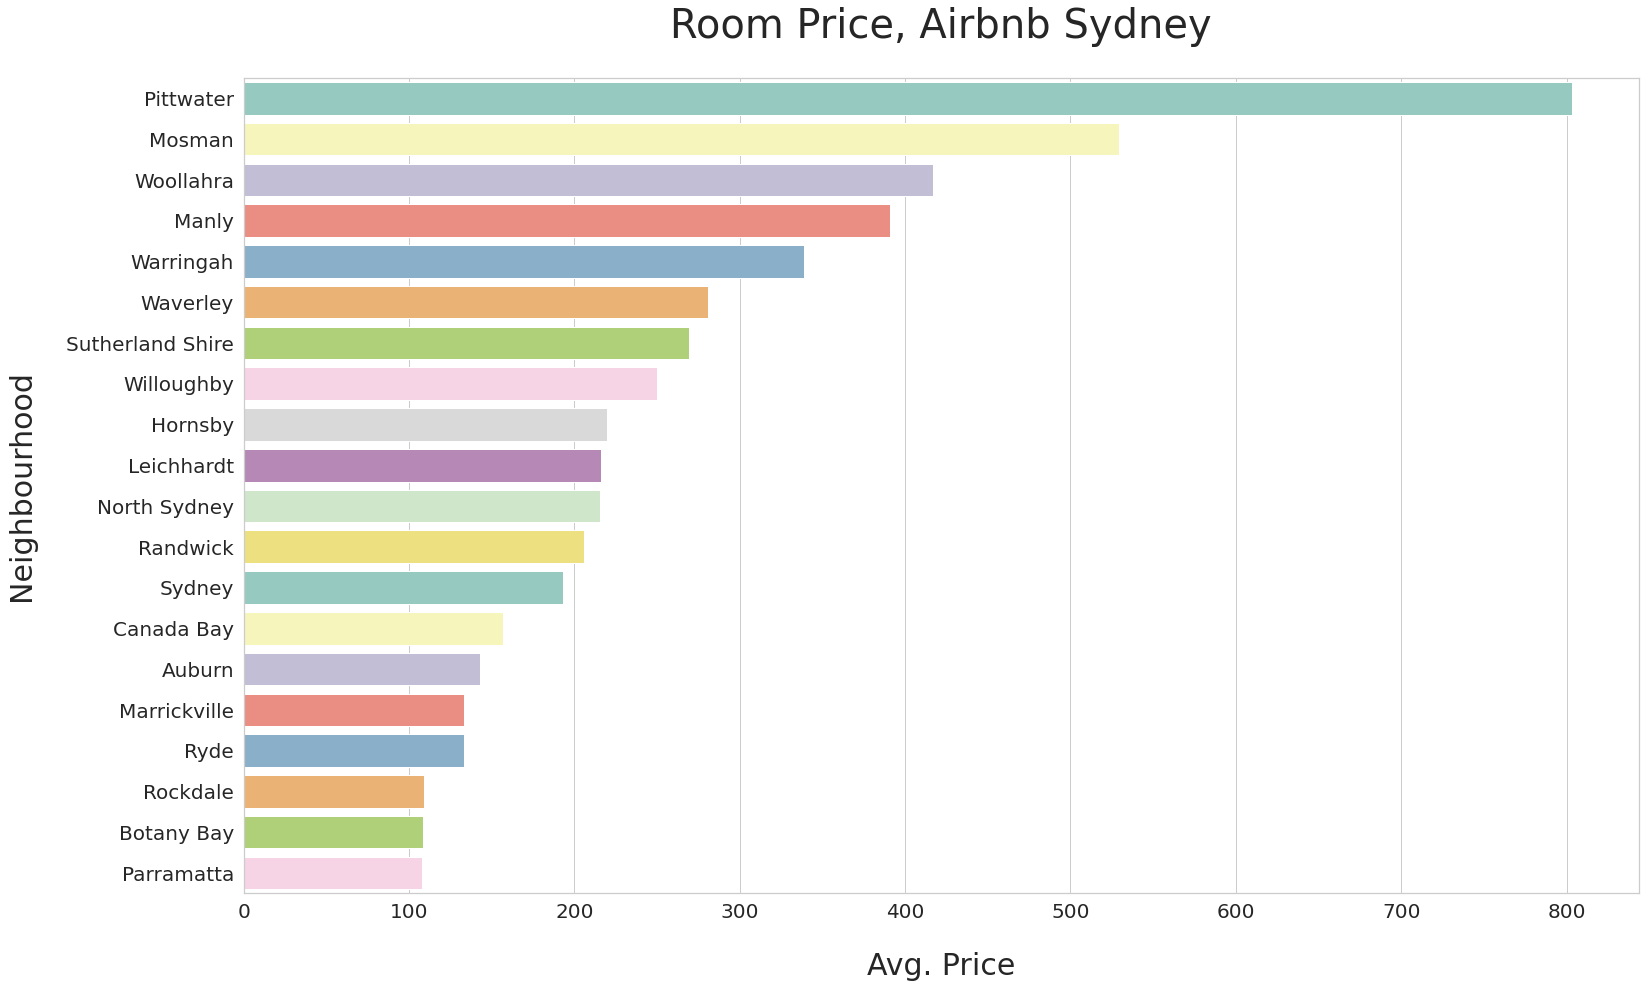

In [ ]:
# Barplot of price by neighbourhood, top 20 neighbourhoods in terms of listings
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
ax.axes.set_title("Room Price, Airbnb Sydney",fontsize=40, pad=40)
ax = sns.barplot(x='price', y='neighbourhood',data=top_price, palette='Set3')
ax.set_xlabel('Avg. Price',fontsize=30,labelpad=30)
ax.set_ylabel('Neighbourhood',fontsize=30,labelpad=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

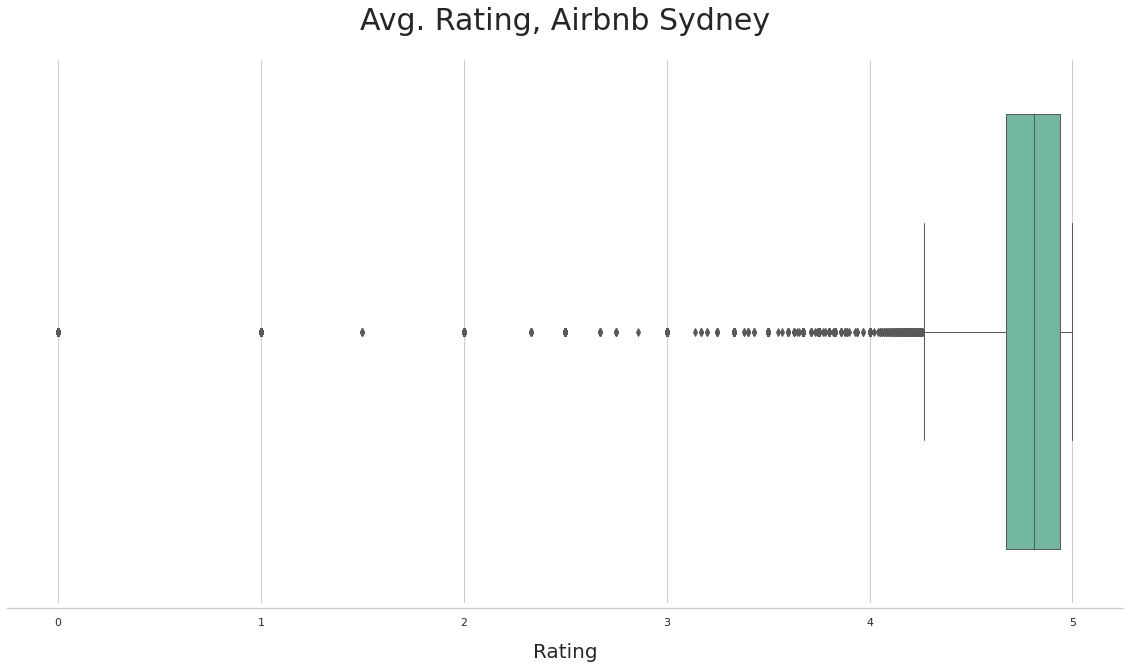

In [ ]:
# Boxplot of the ratings for the listings
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.boxplot(x=listings["review_scores_rating"], linewidth=1, palette='Set2')
ax.set_title('Avg. Rating, Airbnb Sydney',fontsize=30,pad=30) # Give the plot a main title
ax.set_xlabel('Rating',fontsize=20, labelpad=15) # Set text for the x axis,

sns.despine(offset=5, left=True)

**Data prep for choropleth map**

In [ ]:
# Read geo_file
syd_geo = gpd.read_file("/content/drive/MyDrive/USYD S1 2022/QBUS3820/Group Assignment/FINAL CODE/neighbourhoods (1).geojson")

**Number of Airbnb Listings in Sydney** 

In [ ]:
# Create new dataframe for listings grouped by neighbourhood
listings_geo = pd.DataFrame(listings.groupby(['neighbourhood']).id.count()).reset_index()

# Rename column in neighbourhood_cleansed dataframe
listings_geo.rename(columns={'id':'listings'}, 
                 inplace=True)

In [ ]:
# Create function to show geo distribution of numbers via mapbox
def draw_plotmap_num(df):    
    map= px.choropleth_mapbox(
                    data_frame=df,
                    geojson=syd_geo,
                    color='listings',
                    locations='neighbourhood', 
                    featureidkey='properties.neighbourhood',
                    mapbox_style="carto-positron",
                    color_continuous_scale='bluered',
                    center={"lat": -33.86934, "lon": 151.22688},
                    hover_data={'neighbourhood','listings'},
                    opacity=0.7,
                    zoom=8,
                    title='Airbnb listings per Neighbourhood',#map title
    )
   
    map.update_layout(margin=dict(
        l=0,
        r=0,
        b=50,
        t=30,
    ),height=500,width=600)
    
    map.show()

In [ ]:
# Plot choropleth for listings vs. neighbourhood
draw_plotmap_num(listings_geo)

Output hidden; open in https://colab.research.google.com to view.

**Average listings price per neighbourhood**

In [ ]:
# Create new dataframe for listings grouped by neighbourhood
price_geo = pd.DataFrame(listings.groupby(['neighbourhood']).price.mean()).reset_index()

# Rename column in neighbourhood_cleansed dataframe
price_geo.rename(columns={'id':'listings'}, 
                 inplace=True)

In [ ]:
# Create function to show geo distribution of numbers via mapbox
def draw_plotmap_num(df):    
    map= px.choropleth_mapbox(
                    data_frame=df,
                    geojson=syd_geo,
                    color='price',
                    locations='neighbourhood', 
                    featureidkey='properties.neighbourhood',
                    mapbox_style="carto-positron",
                    color_continuous_scale='bluered',
                    center={"lat": -33.86934, "lon": 151.22688},
                    hover_data={'neighbourhood','price'},
                    opacity=0.7,
                    zoom=8,
                    title='Average listings price per neighbourhood',#map title
    )
   
    map.update_layout(margin=dict(
        l=0,
        r=0,
        b=50,
        t=30,
    ),height=500,width=600)
    
    map.show()

In [ ]:
# Plot choropleth for price vs. neighbourhood
draw_plotmap_num(price_geo)

Output hidden; open in https://colab.research.google.com to view.

**Average rating per neigbourhood**

In [ ]:
# Create a new dataframe for ratings grouped by neighbourhood
ratings_geo = pd.DataFrame(listings.groupby(['neighbourhood']).review_scores_rating.mean()).reset_index()

# Rename column in neighbourhood_cleansed dataframe
ratings_geo.rename(columns={'id':'listings'}, 
                 inplace=True)

In [ ]:
# Create function to show geo distribution of numbers via mapbox
def draw_plotmap_num(df):    
    map= px.choropleth_mapbox(
                    data_frame=df,
                    geojson=syd_geo,
                    color='review_scores_rating',
                    locations='neighbourhood', 
                    featureidkey='properties.neighbourhood',
                    mapbox_style="carto-positron",
                    color_continuous_scale='bluered',
                    center={"lat": -33.86934, "lon": 151.22688},
                    hover_data={'neighbourhood','review_scores_rating'},
                    opacity=0.7,
                    zoom=8,
                    title='Average ratings per neighbourhood',#map title
    )
   
    map.update_layout(margin=dict(
        l=0,
        r=0,
        b=50,
        t=30,
    ),height=500,width=600)
    
    map.show()

In [ ]:
# Plot choropleth for price vs. neighbourhood
draw_plotmap_num(ratings_geo)

Output hidden; open in https://colab.research.google.com to view.

# **Valuation set-up** 

In [ ]:
def plot_feature_importance(model, labels, max_features = 20):
    feature_importance = model.feature_importances_*100
    feature_importance = 100*(feature_importance/np.max(feature_importance))
    table = pd.Series(feature_importance, index = labels).sort_values(ascending=True, inplace=False)
    fig, ax = fig, ax = plt.subplots(figsize=(9,6))
    if len(table) > max_features:
        table.iloc[-max_features:].T.plot(kind='barh', edgecolor='black', width=0.7, linewidth=.8, alpha=0.9, ax=ax)
    else:
        table.T.plot(kind='barh', edgecolor='black', width=0.7, linewidth=.8, alpha=0.9, ax=ax)
    ax.tick_params(axis=u'y', length=0) 
    ax.set_title('Variable importance', fontsize=13)
    sns.despine()
    return fig, ax

# **Feature engineering for MLR**

In [ ]:
# Add 'log_price' column
listings['log_price'] = np.log(listings['price'])

# Drop host_since since its no longer useful
listings = listings.drop(['host_since'],axis=1)
listings = listings.drop(['amenities'],axis=1)

In [ ]:
# Label Encoding for both train_listings and test_listings
from sklearn.preprocessing import LabelEncoder
listings[['neighbourhood','room_type','property_type']] = listings[['neighbourhood','room_type','property_type']].astype('str') 
listings[['neighbourhood','room_type','property_type']] = listings[['neighbourhood','room_type','property_type']].apply(LabelEncoder().fit_transform)

# Get dummies for both train_listings and test_listings
listings = pd.get_dummies(listings, drop_first=True)

listings.head()

,id,neighbourhood,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,...,number_of_reviews_ltm,calculated_host_listings_count,reviews_per_month,listing_duration,hosting_duration,amenities_count,log_price,instant_bookable_t,host_is_superhost_f,host_is_superhost_t
0,11156,32,-33.86767,151.22497,50,2,1,65.0,90,180,...,0,1,1.34,3751.0,4459.0,28,4.174387,0,1,0
1,14250,20,-33.80084,151.26378,20,0,6,470.0,2,22,...,1,2,0.04,1977.0,4401.0,29,6.152733,0,0,1
2,15253,32,-33.87964,151.21680,50,2,2,82.0,2,90,...,18,1,3.21,3571.0,4388.0,40,4.406719,1,1,0
3,44545,32,-33.87888,151.21439,17,0,2,130.0,90,365,...,0,1,0.56,3362.0,4248.0,27,4.867534,0,0,1
4,58506,22,-33.81748,151.23484,14,0,4,150.0,2,90,...,15,1,2.23,3989.0,4050.0,31,5.010635,0,0,1


In [ ]:
# Backward selection function

import statsmodels.formula.api as smf

def backward_selected(data, response, nominated = []):
    """Linear model designed by backward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by backward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    if nominated:
        print("you nominated variables %s" %nominated)
    nominated = set(nominated)
    remaining^=nominated
    formula = "{} ~ {} + 1".format(response,' + '.join(remaining | nominated))
    current_score = smf.ols(formula, data).fit().rsquared_adj
    print("adj_r2 if all variables included: %f" %current_score)
    best_new_score = current_score
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(remaining^{candidate}|nominated))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            print("deleting %s increases adj_r2 from %f to %f" %(best_candidate, current_score, best_new_score))
            remaining.remove(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(remaining|nominated))
    model = smf.ols(formula, data).fit()
    print("final model is %s, with adj_r2 of %f" %(formula, model.rsquared_adj))
    return model

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
# Run backward selection on the dataset
model_bs1 = backward_selected(listings[['log_price','neighbourhood','latitude','longitude','property_type','room_type','accommodates','minimum_nights','maximum_nights', 'number_of_reviews','review_scores_rating','instant_bookable_t','host_is_superhost_t','host_is_superhost_f',
                                        'bathrooms','bedrooms','number_of_reviews_ltm','calculated_host_listings_count','reviews_per_month','listing_duration',
                                        'hosting_duration','amenities_count']],'log_price')

adj_r2 if all variables included: 0.649586
deleting host_is_superhost_t increases adj_r2 from 0.649586 to 0.649601
deleting listing_duration increases adj_r2 from 0.649601 to 0.649616
final model is log_price ~ longitude + host_is_superhost_f + accommodates + maximum_nights + number_of_reviews_ltm + property_type + room_type + number_of_reviews + bedrooms + hosting_duration + calculated_host_listings_count + bathrooms + minimum_nights + latitude + neighbourhood + review_scores_rating + instant_bookable_t + amenities_count + reviews_per_month + 1, with adj_r2 of 0.649616


In [ ]:
# Forward selection function
import statsmodels.formula.api as smf

def forward_selected(data, response, nominated = []):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    selected = nominated
    remaining.remove(response)
    remaining ^= set(selected)
    current_score, best_new_score = 0.0, 0.0
    if nominated:
        formula = "{} ~ {} + 1".format(response, ' + '.join(nominated))
        current_score= smf.ols(formula, data).fit().rsquared_adj
        best_new_score = current_score
        print("you nominated variable(s) %s, the adj_r2 is: %f" %(nominated, current_score))
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            print("adding %s increases adj_r2 from %f to %f" %(best_candidate, current_score, best_new_score))
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    print("final model is %s, with adj_r2 of %f" %(formula, model.rsquared_adj))
    return model

In [ ]:
# Run backward selection on the dataset
model_bs1 = forward_selected(listings[['log_price','neighbourhood','latitude','longitude','property_type','room_type','accommodates','minimum_nights', 'maximum_nights','number_of_reviews','review_scores_rating','instant_bookable_t','host_is_superhost_t','host_is_superhost_f',
                                        'bathrooms','bedrooms','number_of_reviews_ltm','calculated_host_listings_count','reviews_per_month','listing_duration',
                                        'hosting_duration','amenities_count']],'log_price')

adding accommodates increases adj_r2 from 0.000000 to 0.483019
adding room_type increases adj_r2 from 0.483019 to 0.569605
adding longitude increases adj_r2 from 0.569605 to 0.605480
adding bedrooms increases adj_r2 from 0.605480 to 0.625090
adding bathrooms increases adj_r2 from 0.625090 to 0.632117
adding latitude increases adj_r2 from 0.632117 to 0.637550
adding minimum_nights increases adj_r2 from 0.637550 to 0.640674
adding property_type increases adj_r2 from 0.640674 to 0.642306
adding calculated_host_listings_count increases adj_r2 from 0.642306 to 0.643908
adding neighbourhood increases adj_r2 from 0.643908 to 0.644949
adding number_of_reviews increases adj_r2 from 0.644949 to 0.646015
adding amenities_count increases adj_r2 from 0.646015 to 0.647107
adding instant_bookable_t increases adj_r2 from 0.647107 to 0.648015
adding review_scores_rating increases adj_r2 from 0.648015 to 0.648698
adding maximum_nights increases adj_r2 from 0.648698 to 0.649138
adding hosting_duration in

**Data split for MLR**

In [ ]:
# Define response variable and predictors
y_var = listings['log_price']
x_var = listings[['accommodates','room_type','longitude','bedrooms','bathrooms','latitude','minimum_nights','maximum_nights','calculated_host_listings_count',
                  'number_of_reviews','amenities_count','property_type','instant_bookable_t','review_scores_rating','neighbourhood',
                  'hosting_duration','number_of_reviews_ltm','host_is_superhost_f','reviews_per_month']]

In [ ]:
# Split training and test sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_var,y_var, test_size=0.2, random_state=9)

# **MODEL 1: MLR**

In [ ]:
import statsmodels.api as sm
import numpy as np
model = sm.OLS(y_train,x_train)
ols = model.fit()
ols.params

accommodates                      0.091293
room_type                        -0.423043
longitude                         0.304501
bedrooms                          0.195437
bathrooms                         0.153339
latitude                          1.245683
minimum_nights                   -0.000540
maximum_nights                   -0.000056
calculated_host_listings_count    0.001873
number_of_reviews                -0.001036
amenities_count                   0.001629
property_type                     0.008376
instant_bookable_t               -0.049999
review_scores_rating              0.029123
neighbourhood                     0.009143
hosting_duration                  0.000035
number_of_reviews_ltm             0.002458
host_is_superhost_f              -0.015960
reviews_per_month                -0.014588
dtype: float64

In [ ]:
# Residuals value
residuals1 = ols.resid
fitted1 = ols.fittedvalues

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



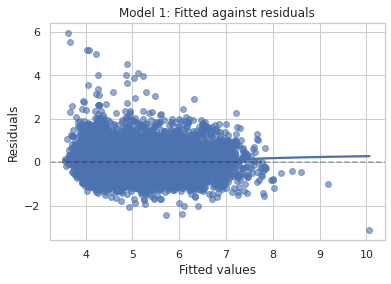

In [ ]:
# Residual values plot
fig, ax= plt.subplots()
sns.regplot(fitted1, residuals1, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Fitted values',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('Model 1: Fitted against residuals')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  

plt.show()

In [ ]:
# VIF to inspect multicollinearity
import statsmodels.api as sm

# VIF of Model 1
features1 = x_train[['accommodates','room_type','longitude','bedrooms','bathrooms','latitude','minimum_nights','maximum_nights','calculated_host_listings_count',
                  'number_of_reviews','amenities_count','property_type','instant_bookable_t','review_scores_rating','neighbourhood',
                  'hosting_duration','number_of_reviews_ltm','host_is_superhost_f','reviews_per_month']]
features1 = sm.add_constant(features1)  

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1 = []
for i in range(19):
    vif1.append(variance_inflation_factor(features1.values, i+1))
    
vif1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



[4.661946957355785,
 12.403545162637796,
 1.447192888282815,
 4.702944707371802,
 1.8386093355866504,
 1.1031463406730997,
 1.4327730563886922,
 1.178064562307902,
 1.1078533013461347,
 2.920252240398044,
 1.4659670406739318,
 11.685558771965427,
 1.1025692640092992,
 1.046299579922689,
 1.3646630770395634,
 1.210035307646757,
 3.343324480633322,
 1.3134205136169979,
 5.641483347879868]

In [ ]:
# Average VIF of Model 1
sum(vif1)/19

3.2089289439861357

**Evaluate MLR**

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Model 1 - MLR evaluated on 'log_price'
predictions1 = ols.predict(x_test)
mse1 = mean_squared_error(y_test, predictions1)
rmse1 = np.sqrt(mse1)
r_2_1 = r2_score(y_test, predictions1) # R^2
mae1 = mean_absolute_error(y_test, predictions1) # Mean absolute error

print('RMSE of Model 1 (Log-transformed price): $',rmse1.round(4))
print('R^2 of Model 1 (Log-transformed price):',(r_2_1*100).round(2),'%')
print('MAE (Log-transformed price): $', mae1.round(4) )

RMSE of Model 1 (Log-transformed price): $ 0.5417
R^2 of Model 1 (Log-transformed price): 63.83 %
MAE (Log-transformed price): $ 0.4029


In [ ]:
# Model 1 - MLR evaluated on 'price'
predictions1_exp = np.exp(predictions1) # Exponential 'log_price' predictions back to 'price'
mse1 = mean_squared_error(np.exp(y_test), predictions1_exp)
rmse1 = np.sqrt(mse1)
r_2_1 = r2_score(np.exp(y_test), predictions1_exp) # R^2
mae1 = mean_absolute_error(np.exp(y_test), predictions1_exp) # Mean absolute error

print('RMSE of Model 1 (Price): $',rmse1.round(4))
print('R^2 of Model 1 (Price):',(r_2_1*100).round(2),'%')
print('MAE (Price): $', mae1.round(4) )

RMSE of Model 1 (Price): $ 3812.2042
R^2 of Model 1 (Price): -4022.01 %
MAE (Price): $ 168.5518


# **Feature engineering for Tree-based models**

In [ ]:
# Correlation
# Benchmark correlation coefficient = 0.4
listings_corr = listings.corr().round(2)
listings_corr['price'].sort_values(ascending=False)

price                             1.00
log_price                         0.65
bedrooms                          0.45
bathrooms                         0.43
accommodates                      0.43
latitude                          0.19
longitude                         0.16
amenities_count                   0.12
calculated_host_listings_count    0.08
neighbourhood                     0.07
id                                0.05
review_scores_rating              0.04
hosting_duration                  0.04
host_is_superhost_t               0.01
listing_duration                 -0.00
host_is_superhost_f              -0.01
number_of_reviews_ltm            -0.02
reviews_per_month                -0.03
number_of_reviews                -0.04
minimum_nights                   -0.05
instant_bookable_t               -0.08
maximum_nights                   -0.10
property_type                    -0.20
room_type                        -0.22
Name: price, dtype: float64

In [ ]:
# Define reponse variables and predictors
y_var2 = listings['log_price']
x_var2 = listings[['accommodates','bedrooms','bathrooms','longitude','amenities_count','latitude','room_type', 'property_type','review_scores_rating']]

**Data split for Tree-based models**

In [ ]:
# Split training and test sets
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x_var2,y_var2, test_size=0.2, random_state=12)

# **MODEL 2: XGBOOST**

# *XGBoost - ScikitLearn*

**XGBoost (Scikitlearn) - Train model**

In [ ]:
%%time

import xgboost as xgb

xgbst = xgb.XGBRegressor(objective='reg:squarederror', booster = 'gbtree', learning_rate = 0.02, 
                        max_depth = 6, n_estimators = 2000, subsample = 0.60,  reg_lambda=0.0, 
                        reg_alpha = 0.0, colsample_bytree = 1.0, min_child_weight = 1.0)

# n_estimators: number of trees
# subsample: fraction of observations used to fit each tree
# reg_lambda: L2 regularisation penalty
# reg_alpha: L1 regularisation penalty
# colsample_bytree: fraction of features considered for each tree (alternatives: bylevel, bynode)
# min_child_weight: approximately equal to the minimum number of samples in each node

# Fit XGboost on training data
xgbst.fit(X_train, Y_train)

CPU times: user 11 s, sys: 26 ms, total: 11.1 s
Wall time: 11.2 s


**XGBoost (Scikitlearn) - Predictions**

In [ ]:
# Model 2 - Predictions
predictions2 = xgbst.predict(X_test) # Predict using XGBoost

# Observe outcomes
predictions2

array([4.1826744, 5.5129128, 5.9799747, ..., 5.866647 , 4.1550617,
       4.4402485], dtype=float32)

In [ ]:
# Observe any 'nan' values in prediction outcomes
print('NaN values exist:', np.any(np.isnan(predictions2)))

# Observe any 'inf' values in predictions outcomes
print('Infinite values exist:', np.any(np.isfinite(predictions2)))

NaN values exist: True
Infinite values exist: True


In [ ]:
# Calculate 'max' values of predictions2, ignoring 'nan' values
predictions2_max = np.nanmax(predictions2)
print('Max of predictions2:', predictions2_max)

# # Calculate 'min' values of predictions2, ignoring 'nan' values
predictions2_min = np.nanmin(predictions2)
print('Min of predictions2:', predictions2_min)

# Calculate mean of predictions2, ignoring 'nan'
predictions2_mean = np.nanmean(predictions2)
print('Mean of predictions2:', predictions2_mean)

Max of predictions2: 7.4606867
Min of predictions2: 3.3617358
Mean of predictions2: 4.834348


In [ ]:
# Replace 'nan' values in predictions 2 with its 'mean excl. nan'
# Replace positive infinite values ('inf') in predictions2 with its 'max excl. nan'
# Replace negative infnite values ('inf') in predictions2 with its 'min excl. nan'
predictions2 = np.nan_to_num(predictions2, nan=predictions2_mean, posinf=predictions2_max, neginf=predictions2_min)

In [ ]:
# Observe predictions outcome after filling in 'nan' and 'inf' values
print('Predictions of Model 2:', predictions2)

# Observe any 'nan' values after replacement actions
print('NaN values exist:', np.any(np.isnan(predictions2)))

# Observe any 'inf' values after replacement actions
print('Infinite values exist:', np.any(np.isinf(predictions2)))

Predictions of Model 2: [4.1826744 5.5129128 5.9799747 ... 5.866647  4.1550617 4.4402485]
NaN values exist: False
Infinite values exist: False


**XGBoost (ScikitLearn) - Evaluations**

In [ ]:
# Model 2 - Evaluation on 'log_price'
mse2 = mean_squared_error(Y_test, predictions2) # Mean squared error
rmse2 = np.sqrt(mse2) # Root mean squared error
r_2_2 = r2_score(Y_test, predictions2) # R^2
mae2 = mean_absolute_error(Y_test, predictions2) # Mean absolute error

print('RMSE of Model 2 (Log-Price): $',rmse2.round(4))
print('R^2 of Model 2  (Log-Price):',(r_2_2*100).round(2), '%')
print('MAE (Log-Price): $', mae2.round(4) )

RMSE of Model 2 (Log-Price): $ 0.5163
R^2 of Model 2  (Log-Price): 65.47 %
MAE (Log-Price): $ 0.3778


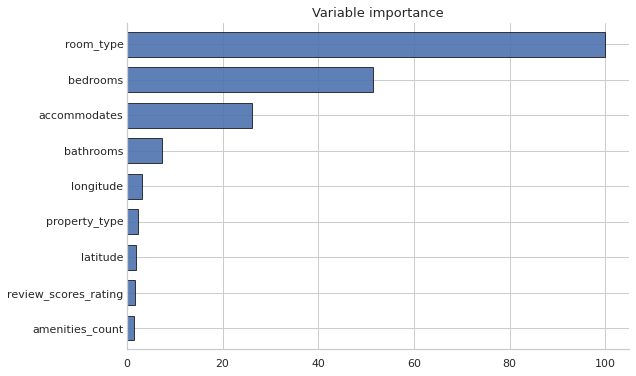

In [ ]:
# Feature importance
plot_feature_importance(xgbst, labels=list(X_train))
plt.show()



------------------------------------------------------------------------------



# *XGBoost - RandomizedSearchCV as hyperparameter optimiser* **(CHOSEN)**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

xgb_RSCV = xgb.XGBRegressor(seed=20)

params_xgbRSCV = {
   'max_depth': [3, 5, 6, 10, 15, 20],
   'learning_rate': [0.01, 0.1, 0.2, 0.3],
   'n_estimators': [100, 500, 1000], # n_estimators: number of trees
   'subsample': np.arange(0.5, 1.0, 0.1),
   'colsample_bytree': np.arange(0.4, 1.0, 0.1),
   'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
}

# kf = KFold(shuffle=True, n_splits=5)

xgb_search = RandomizedSearchCV(estimator=xgb_RSCV, param_distributions=params_xgbRSCV, scoring='neg_mean_squared_error', random_state=20, n_iter=25, verbose=1)

In [ ]:
# Fit XGboost on training data
xgb_search.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[06:25:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:25:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:25:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:25:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:25:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:25:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:25:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:25:32] WARNING: /workspace/src/objective/regr

RandomizedSearchCV(estimator=XGBRegressor(seed=20), n_iter=25,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 6, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   random_state=20, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
# Best parameters using RandomizedsearchCV
print("Best parameters:") 
xgb_search.best_params_

Best parameters:


{'colsample_bylevel': 0.4,
 'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 500,
 'subsample': 0.8999999999999999}

In [ ]:
# Predict using XGBoost (CV) on test data
predictions8 = xgb_search.predict(X_test)

**XGBoost (CV) - Evaluation**

In [ ]:
# XGBoost (CV) - Evaluation
mse8 = mean_squared_error(Y_test, predictions8) # Mean squared error
rmse8 = np.sqrt(mse8) # Root mean squared error
r_2_8 = r2_score(Y_test, predictions8) # R^2
mae8 = mean_absolute_error(Y_test, predictions8) # Mean absolute error

print('RMSE of Model 8: $',rmse8.round(4))
print('R^2 of Model 8:',(r_2_8*100).round(2), '%')
print('MAE: $', mae8.round(4) )

RMSE of Model 8: $ 0.4758
R^2 of Model 8: 70.68 %
MAE: $ 0.347


# *XGBoost - Grid Search as hyperparameter optimiser*

**Tune hyperparameter using GridSearchCV**

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

params_grid_search = {'max_depth': [3, 5, 6, 12],
                      'learning_rate': [0.01, 0.1, 0.3],
                      'n_estimators': [100, 500, 1000], # n_estimators: number of trees
}
xgbr = xgb.XGBRegressor(seed = 19)

xgb_grid_search = GridSearchCV(estimator=xgbr, 
                   param_grid=params_grid_search,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

**Train using XGBoost - Grid Search**

In [ ]:
# Fit using XGBoost - GridSearchCV as hyperparameter optimiser
xgb_grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[06:46:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:26] WARNING: /workspace/src/objective/regr

GridSearchCV(estimator=XGBRegressor(seed=19),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 6, 12],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error', verbose=1)

**Fit using XGBoost - GridSearchCV as hyperparameter optimiser**

In [ ]:
# Fit using XGBoost - GridSearchCV as hyperparameter optimiser
predictions9 = xgb_grid_search.predict(X_test)

In [ ]:
# Best parameters from XGBoost - GridSearchCV
print("Best parameters using GridSearchCV:")
xgb_grid_search.best_params_

Best parameters using GridSearchCV:


{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000}

**XGBoost (GridSearchCV) - Evaluation**

In [ ]:
# XGBoost (CV) - Evaluation
mse9 = mean_squared_error(Y_test, predictions9) # Mean squared error
rmse9 = np.sqrt(mse9) # Root mean squared error
r_2_9 = r2_score(Y_test, predictions9) # R^2
mae9 = mean_absolute_error(Y_test, predictions9) # Mean absolute error

print('RMSE of Model 9: $',rmse9.round(4))
print('R^2 of Model 9:',(r_2_9*100).round(2), '%')
print('MAE: $', mae9.round(4) )

RMSE of Model 9: $ 0.4781
R^2 of Model 9: 70.39 %
MAE: $ 0.3494


# **MODEL 3: LIGHTGBM**





# *LightGBM (Sckit-learn API)* 
- Implementation of the scikit-learn API for LightGBM.

In [ ]:
# LightGBM using pre-selected parameters based on intuitions and reasonable values
%%time

import lightgbm as lgb

lgbm = lgb.LGBMRegressor(objective='regression', boosting_type = 'gbdt', 
                         n_estimators = 1000, learning_rate = 0.01,  
                         num_leaves = 24,
                         lambda_l1 = 0.0, lambda_l2 = 0.0,
                         bagging_fraction = 0.74, bagging_freq = 1, 
                         feature_fraction = 1.0, min_data_in_leaf = 1)

lgbm = lgbm.fit(X_train, Y_train)

CPU times: user 2.96 s, sys: 69.9 ms, total: 3.03 s
Wall time: 4.35 s


In [ ]:
# Model 3 - LightGBM

predictions3 = lgbm.predict(X_test) # Predict using XGBoost
mse3 = mean_squared_error(Y_test, predictions3) # Mean squared error
rmse3 = np.sqrt(mse3) # Root mean squared error
r2_3 = r2_score(Y_test, predictions3) # R^2
mae3 = mean_absolute_error(Y_test, predictions3) # Mean absolute error

print('RMSE of Model 3: $',rmse3.round(4))
print('R^2 of Model 3:',(r2_3*100).round(2), '%')
print('MAE:', mae3.round(4) )

RMSE of Model 3: $ 0.474
R^2 of Model 3: 70.9 %
MAE: 0.3472


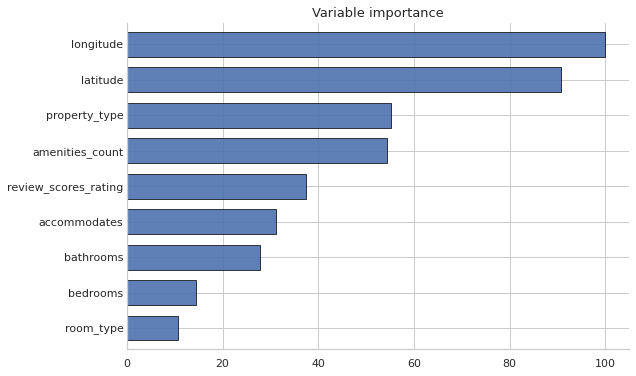

In [ ]:
# Feature importance
plot_feature_importance(lgbm, labels=list(X_train))
plt.show()

# *Data conversion for Manual LightGBM*

In [ ]:
# Convert dataset into LightGBm format
train_data = lgb.Dataset(X_train, Y_train)
valid_data = lgb.Dataset(X_test, Y_test, reference = train_data)

To train the model, we create a dictionary with the hyperparameters and settings and pass it the train function. As an additional detail, we also pass the validation set for evaluation. 

# *LightGBM - LightGBMTunerCV as hyperparameter optimiser*

**Hyperparameter optimisation using LightGBMTunerCV**

- Hyperparameter tuner for LightGBM with cross-validation.
- The `LightGBMTunerCV` function implements an efficient algorithm for tuning LightGBM.
- `LightGBMTuner` is a similar function that uses a validation set. 
- Instead of jointly optimising the hyperparameters, this implementation optimises one hyperparameter at time. 
- The optimised hyperparameters are `lambda_l1`, `lambda_l2`, `num_leaves`, `feature_fraction`, `bagging_fraction`, `bagging_freq` and `min_data_in_leaf`.  


This method runs faster than the more generic hyperparameter optimisation procedure, making it a good starting point. Either algorithm can perform better depending on the problem. 

In [ ]:
# LightGBMTunerCV

import optuna.integration.lightgbm as lgb

dtrain = lgb.Dataset(X_train, Y_train)
    
params_tuner = {
    'objective': 'regression',
    'metric': 'l2',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'feature_pre_filter': False,
    'verbosity': -1,
}

tuner = lgb.LightGBMTunerCV(params_tuner, dtrain, num_boost_round = 5000, early_stopping_rounds = 100, 
                            verbose_eval=1000, time_budget = 120, nfold=5, stratified = False)

tuner.run()

[I 2022-05-30 07:16:36,902] A new study created in memory with name: no-name-12b46d05-6b73-48cd-8a3a-a1ddad4c7c19
num_leaves, val_score: 0.221226:  55%|#####5    | 11/20 [00:39<00:34,  3.86s/it]

[1000]	cv_agg's l2: 0.229383 + 0.012951
[2000]	cv_agg's l2: 0.22597 + 0.0126152


num_leaves, val_score: 0.221226:  65%|######5   | 13/20 [00:49<00:29,  4.21s/it]

[1000]	cv_agg's l2: 0.229383 + 0.012951
[2000]	cv_agg's l2: 0.22597 + 0.0126152


  0%|          | 0/5 [00:00<?, ?it/s]


In [ ]:
# Print selected parameter using LightGBMTunerCV
print('Best params:')
tuner.best_params

Best params:


{'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'boosting_type': 'gbdt',
 'feature_fraction': 0.8,
 'feature_pre_filter': False,
 'lambda_l1': 0.0,
 'lambda_l2': 0.0,
 'learning_rate': 0.05,
 'metric': 'l2',
 'min_child_samples': 20,
 'num_leaves': 31,
 'objective': 'regression',
 'verbosity': -1}

**LightGBM - LightGBMTunerCV as hyperparameter tuner**

In [ ]:
import lightgbm as lgb
params_tuner = {
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'boosting_type': 'gbdt',
 'feature_fraction': 0.8,
 'feature_pre_filter': False,
 'lambda_l1': 0.0,
 'lambda_l2': 0.0,
 'learning_rate': 0.05,
 'metric': 'l2',
 'min_child_samples': 20,
 'num_leaves': 31,
 'objective': 'regression',
 'verbosity': -1}

evals_lgbm_tunercv = {} 

lgbm_tunercv = lgb.train(params_tuner, train_data, num_boost_round = 5000, valid_sets = [train_data, valid_data],
                 valid_names=['Training', 'Validation'], early_stopping_rounds = 50, evals_result = evals_lgbm_tunercv, verbose_eval = -1)

Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[260]	Training's l2: 0.179411	Validation's l2: 0.22647


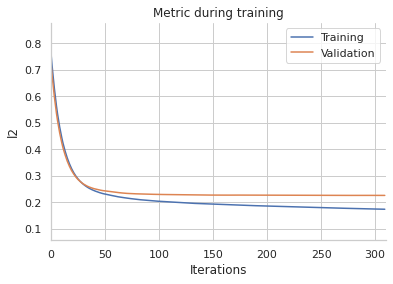

In [ ]:
# Plot training and testing errors against the number of trees. Boosting is slow to overfit
lgb.plot_metric(evals_lgbm_tunercv, metric = 'l2')
sns.despine()
plt.show()

**LightGBMTunerCV - Model Evaluation**

In [ ]:
# LightGBM using Optuna as a hyperparameter tuner

predictions6 = lgbm_tunercv.predict(X_test) # Predict using XGBoost
mse6 = mean_squared_error(Y_test, predictions6) # Mean squared error
rmse6 = np.sqrt(mse6) # Root mean squared error
r2_6 = r2_score(Y_test, predictions6) # R^2
mae6 = mean_absolute_error(Y_test, predictions6) # Mean absolute error

print('RMSE of Model 6: $',rmse6.round(4))
print('R^2 of Model 6:',(r2_6*100).round(2), '%')
print('MAE: $', mae6.round(4) )

RMSE of Model 6: $ 0.4759
R^2 of Model 6: 70.67 %
MAE: $ 0.3463


# *LightGBM - Optuna, CV* **(CHOSEN)**

**Generic Hyperparameters optimisation**

*CV Function incorporated*
- Perform the cross-validation with given parameters.
- The `cv` function returns a dictionary with the requested CV metrics computed for each boosting iterations. The last entry is the one for the best iteration when using early stopping. 
- [Link](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.cv.html)

In [ ]:
# Generic hyperparameters optimisation
from optuna.samplers import TPESampler

def objective(trial):
    
    params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'learning_rate': 0.01, 
    'num_leaves': trial.suggest_int('num_leaves', 2, 64),
    'lambda_l1': trial.suggest_loguniform('lambda_l1',  1e-8, 10), 
    'lambda_l2': trial.suggest_loguniform('lambda_l2',  1e-8, 10), 
    'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
    'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
    'feature_fraction':  trial.suggest_uniform('feature_fraction', 0.5, 1.0),
    'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 128), 
    'feature_pre_filter': False,
    'verbosity': -1,
     }
    
    # Cross-validation 
    history = lgb.cv(params, train_data, num_boost_round = 5000, 
                 nfold = 5, stratified = False, early_stopping_rounds = 50, verbose_eval=0)
    
    # Save full set of parameters
    trial.set_user_attr('params', params)
    
    # Save the number of boosting iterations selected by early stopping
    trial.set_user_attr('num_boost_round', len(history['l2-mean']))
    
    return history['l2-mean'][-1] # returns CV error for the best trial

sampler = TPESampler(seed = 42) 
study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials=500, timeout = 600)  

# The higher the timeout, the better the chances of finding a good configuration. 

[I 2022-05-30 07:19:37,832] A new study created in memory with name: no-name-3634a45c-92c2-4b49-8478-d400f365035a
[I 2022-05-30 07:19:58,618] Trial 0 finished with value: 0.22034016073438972 and parameters: {'num_leaves': 25, 'lambda_l1': 3.6010467344475403, 'lambda_l2': 0.038720902953704193, 'bagging_fraction': 0.7993292420985183, 'bagging_freq': 2, 'feature_fraction': 0.5779972601681014, 'min_data_in_leaf': 8}. Best is trial 0 with value: 0.22034016073438972.
[I 2022-05-30 07:20:10,484] Trial 1 finished with value: 0.22445105525858206 and parameters: {'num_leaves': 56, 'lambda_l1': 0.002570603566117598, 'lambda_l2': 0.023585940584142682, 'bagging_fraction': 0.5102922471479012, 'bagging_freq': 10, 'feature_fraction': 0.9162213204002109, 'min_data_in_leaf': 28}. Best is trial 0 with value: 0.22034016073438972.
[I 2022-05-30 07:20:34,103] Trial 2 finished with value: 0.22376138361482972 and parameters: {'num_leaves': 13, 'lambda_l1': 4.4734294104626844e-07, 'lambda_l2': 5.47242964203219

We retrieve the best parameters as follows.

In [ ]:
params = study.best_trial.user_attrs['params']
num_trees = study.best_trial.user_attrs['num_boost_round']

print(f'Number of boosting iterations: {num_trees} \n')

print('Best parameters:')
params 

Number of boosting iterations: 2021 

Best parameters:


{'bagging_fraction': 0.9693523237498172,
 'bagging_freq': 2,
 'boosting_type': 'gbdt',
 'feature_fraction': 0.7327267030213958,
 'feature_pre_filter': False,
 'lambda_l1': 0.11233157297600226,
 'lambda_l2': 3.4106549729035374,
 'learning_rate': 0.01,
 'min_data_in_leaf': 1,
 'num_leaves': 29,
 'objective': 'regression',
 'verbosity': -1}

With some many hyperparameters, it's helpful to know which ones make the most difference for the quality of the model. Use`get_param_importances` function to obtain outcomes.

In [ ]:
# Important parameters
importance = optuna.importance.get_param_importances(study)

importance

OrderedDict([('min_data_in_leaf', 0.676400614055523),
             ('bagging_fraction', 0.11231319185328263),
             ('bagging_freq', 0.09522716600064869),
             ('num_leaves', 0.09502851602235468),
             ('feature_fraction', 0.017826198480691717),
             ('lambda_l2', 0.0022873280999801135),
             ('lambda_l1', 0.0009169854875190532)])

**LightGBM Train API - Generic hyperparameter optimiser**

In [ ]:
import lightgbm as lgb

params_generic = {
 'bagging_fraction': 0.874297848963571,
 'bagging_freq': 2,
 'boosting_type': 'gbdt',
 'feature_fraction': 0.8175558194812812,
 'feature_pre_filter': False,
 'lambda_l1': 0.007147235613982666,
 'lambda_l2': 0.013899500025362737,
 'learning_rate': 0.01,
 'min_data_in_leaf': 2,
 'num_leaves': 39,
 'objective': 'regression',
 'verbosity': -1}

evals_generic = {} 

lgbm_generic = lgb.train(params_generic, train_data, num_boost_round = 1485, valid_sets = [train_data, valid_data],
                 valid_names=['Training', 'Validation'], early_stopping_rounds = 50, evals_result = evals_generic, verbose_eval = -1)

Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[1485]	Training's l2: 0.151498	Validation's l2: 0.224309


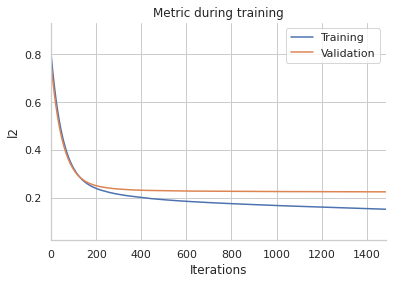

In [ ]:
# Plot training and testing errors against the number of trees. Boosting is slow to overfit
lgb.plot_metric(evals_generic, metric = 'l2')
sns.despine()
plt.show()

**LightGBM - Generic hyperparameters - Model Evaluation**

In [ ]:
# LightGBM using Generic hyperparameters optimiser

predictions7 = lgbm_generic.predict(X_test) # Predict using XGBoost
mse7 = mean_squared_error(Y_test, predictions7) # Mean squared error
rmse7 = np.sqrt(mse7) # Root mean squared error
r2_7 = r2_score(Y_test, predictions7) # R^2
mae7 = mean_absolute_error(Y_test, predictions7) # Mean absolute error

print('RMSE of Model 7: $',rmse7.round(4))
print('R^2 of Model 7:',(r2_7*100).round(2), '%')
print('MAE: $', mae7.round(4) )

RMSE of Model 7: $ 0.4736
R^2 of Model 7: 70.95 %
MAE: $ 0.3452


# *LightGBM - Optuna, CV with PrunningCallBack*

**Optuna integration**

*CV Function incorporated*
- Perform the cross-validation with given parameters.
- The `cv` function returns a dictionary with the requested CV metrics computed for each boosting iterations. The last entry is the one for the best iteration when using early stopping. 
- [Link](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.cv.html)

In [ ]:
# Optuna

from optuna.integration import LightGBMPruningCallback

def objective(trial):

# Put parameters into a dictionary  
    params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': trial.suggest_int('num_leaves', 2, 64),
    'lambda_l1': trial.suggest_loguniform('lambda_l1',  1e-8, 10.0), 
    'lambda_l2': trial.suggest_loguniform('lambda_l2',  1e-8, 10.0), 
    'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
    'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
    'feature_fraction':  trial.suggest_uniform('feature_fraction', 0.3, 1.0),
    'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 128),
    'feature_pre_filter': False,
    'verbosity': -1,
     }
    
    # Instantiate pruning callback
    pruning_callback =  LightGBMPruningCallback(trial, 'l2')
    
    # LightGBM cross-validation
    history = lgb.cv(params, train_data, num_boost_round = 5000, 
                 nfold = 5, stratified = False, early_stopping_rounds = 100,
                 callbacks = [pruning_callback])
    
    # Save full set of parameters
    trial.set_user_attr('params', params)
    
    # Save the number of boosting iterations selected by early stopping
    trial.set_user_attr('num_boost_round', len(history['l2-mean']))
    
    return history['l2-mean'][-1] # returns CV error for the best trial

# Instantiating the sampler to set the random seed
sampler = TPESampler(seed=42) 

# Instantiating the pruner
# The min_resource should be the minimum number of trees required to reasonably judge performance
# This can be tricky to get it right for boosting
# See the notes in the documentation:
# https://optuna.readthedocs.io/en/stable/reference/generated/optuna.pruners.HyperbandPruner.html

pruner = optuna.pruners.HyperbandPruner(min_resource = 100, max_resource = 'auto', reduction_factor = 3)

# A simpler alternative is the median pruner
# This method prunes trials with partial performance below the median of previous trials 
# pruner = optuna.pruners.MedianPruner(n_startup_trials = 10, n_warmup_steps = 500, interval_steps = 5)

study_optuna = optuna.create_study(direction='minimize', sampler = sampler, pruner = pruner)
study_optuna.optimize(objective, n_trials = 500, timeout= 600)

[I 2022-05-30 07:38:41,417] A new study created in memory with name: no-name-0e0d1bf2-2e37-454a-9c7f-8941f9ff928d
[I 2022-05-30 07:38:48,865] Trial 0 finished with value: 0.22176129024872307 and parameters: {'num_leaves': 25, 'lambda_l1': 3.6010467344475403, 'lambda_l2': 0.038720902953704193, 'bagging_fraction': 0.7993292420985183, 'bagging_freq': 2, 'feature_fraction': 0.40919616423534183, 'min_data_in_leaf': 8}. Best is trial 0 with value: 0.22176129024872307.
[I 2022-05-30 07:38:52,550] Trial 1 finished with value: 0.2261005475866122 and parameters: {'num_leaves': 56, 'lambda_l1': 0.002570603566117598, 'lambda_l2': 0.023585940584142682, 'bagging_fraction': 0.5102922471479012, 'bagging_freq': 10, 'feature_fraction': 0.8827098485602951, 'min_data_in_leaf': 28}. Best is trial 0 with value: 0.22176129024872307.
[I 2022-05-30 07:38:59,427] Trial 2 finished with value: 0.22507590314469567 and parameters: {'num_leaves': 13, 'lambda_l1': 4.4734294104626844e-07, 'lambda_l2': 5.47242964203219

In [ ]:
# Best parameters from the study
params_optuna = study_optuna.best_trial.user_attrs['params']
num_trees_optuna = study_optuna.best_trial.user_attrs['num_boost_round']

print(f'Number of boosting iterations: {num_trees} \n')

print('Best parameters from Optuna study:')
params_optuna 

Number of boosting iterations: 2021 

Best parameters from Optuna study:


{'bagging_fraction': 0.9329015102208045,
 'bagging_freq': 1,
 'boosting_type': 'gbdt',
 'feature_fraction': 0.5609632790224144,
 'feature_pre_filter': False,
 'lambda_l1': 0.0732894021242935,
 'lambda_l2': 1.2532339765321006,
 'learning_rate': 0.05,
 'min_data_in_leaf': 1,
 'num_leaves': 43,
 'objective': 'regression',
 'verbosity': -1}

**LightGBM Training API - Optuna as hyperparameter tuner**
- Perform the training with given parameters.
- [Link](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.train.html)

In [ ]:
import lightgbm as lgb
params_optuna2 = {
 'bagging_fraction': 0.984975701185954,
 'bagging_freq': 2,
 'boosting_type': 'gbdt',
 'feature_fraction': 0.7121576887031548,
 'feature_pre_filter': False,
 'lambda_l1': 2.3912581095757125e-06,
 'lambda_l2': 5.111584437901716,
 'learning_rate': 0.05,
 'min_data_in_leaf': 3,
 'num_leaves': 44,
 'objective': 'regression',
 'verbosity': -1}

evals_optuna = {} 

lgbm_optuna = lgb.train(params_optuna2, train_data, num_boost_round = 2052, valid_sets = [train_data, valid_data],
                 valid_names=['Training', 'Validation'], early_stopping_rounds = 50, evals_result = evals_optuna)

[1]	Training's l2: 0.761694	Validation's l2: 0.723614
Training until validation scores don't improve for 50 rounds.
[2]	Training's l2: 0.71472	Validation's l2: 0.678859
[3]	Training's l2: 0.672959	Validation's l2: 0.639176
[4]	Training's l2: 0.633992	Validation's l2: 0.602341
[5]	Training's l2: 0.597904	Validation's l2: 0.568266
[6]	Training's l2: 0.56712	Validation's l2: 0.539361
[7]	Training's l2: 0.537188	Validation's l2: 0.511206
[8]	Training's l2: 0.510755	Validation's l2: 0.48653
[9]	Training's l2: 0.486379	Validation's l2: 0.464157
[10]	Training's l2: 0.466237	Validation's l2: 0.445373
[11]	Training's l2: 0.445268	Validation's l2: 0.426005
[12]	Training's l2: 0.426267	Validation's l2: 0.408641
[13]	Training's l2: 0.410163	Validation's l2: 0.393844
[14]	Training's l2: 0.394869	Validation's l2: 0.380242
[15]	Training's l2: 0.380845	Validation's l2: 0.367575
[16]	Training's l2: 0.36787	Validation's l2: 0.355942
[17]	Training's l2: 0.356373	Validation's l2: 0.345753
[18]	Training's 

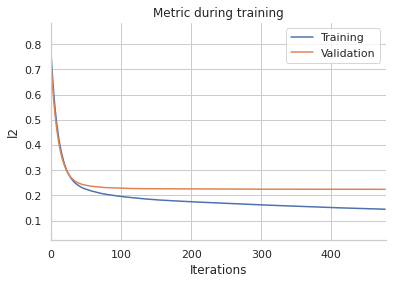

In [ ]:
# Plot training and testing errors against the number of trees. Boosting is slow to overfit
lgb.plot_metric(evals_optuna, metric = 'l2')
sns.despine()
plt.show()

**LightGBM - Optuna Evaluation**

In [ ]:
# LightGBM using Optuna as a hyperparameter tuner

predictions5 = lgbm_optuna.predict(X_test) # Predict using XGBoost
mse5 = mean_squared_error(Y_test, predictions5) # Mean squared error
rmse5 = np.sqrt(mse5) # Root mean squared error
r2_5 = r2_score(Y_test, predictions5) # R^2
mae5 = mean_absolute_error(Y_test, predictions5) # Mean absolute error

print('RMSE of Model 5: $',rmse5.round(4))
print('R^2 of Model 5:',(r2_5*100).round(2), '%')
print('MAE: $', mae5.round(4) )

RMSE of Model 5: $ 0.4738
R^2 of Model 5: 70.92 %
MAE: $ 0.3446


# **MODEL 4: CATBOOST**

# *Cat Boost (ScikitLearn API)*

In [ ]:
# CatBoost using Scikit learn

%time
from catboost import CatBoostRegressor

cb = CatBoostRegressor(loss_function='RMSE', 
                       iterations = 2000, learning_rate = 0.01,
                       l2_leaf_reg = 0.0,
                       max_depth = 6, 
                       subsample = 0.8, 
                       verbose=0)
        
cb.fit(X_train, Y_train)

# Important! If there were categorical features, you'd want to change the code to
# cb.fit(X_train, y_train, cat_features = cat_indices)
# where cat_indices is a one-dimensional array of indices indicating the categorical columns in X_train

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs


In [ ]:
# Model 4 - CatBoost

predictions4 = cb.predict(X_test) # Predict using XGBoost
mse4 = mean_squared_error(Y_test, predictions4) # Mean squared error
rmse4 = np.sqrt(mse4) # Root mean squared error
r2_4 = r2_score(Y_test, predictions4) # R^2
mae4 = mean_absolute_error(Y_test, predictions4) # Mean absolute error

print('RMSE of Model 4: $',rmse4.round(4))
print('R^2 of Model 4:',(r2_4*100).round(2), '%')
print('MAE:', mae4.round(4) )

RMSE of Model 4: $ 0.4745
R^2 of Model 4: 70.84 %
MAE: 0.3462


# *Cat Boost - Optuna as hyperparameter optimiser* **(CHOSEN)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
import optuna
from optuna.samplers import TPESampler

def objective(trial):
    param = {
        "loss_function": trial.suggest_categorical("loss_function", ["RMSE", "MAE"]),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 1e0),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-2, 1e0),
        "depth": trial.suggest_int("depth", 1, 10),
        "iterations": trial.suggest_int("iterations", 50, 1000)
    }
    reg = CatBoostRegressor(**param)
    reg.fit(X_train, Y_train, eval_set=[(X_test, Y_test)], verbose=0, early_stopping_rounds=100)
    y_pred = reg.predict(X_test)
    score = r2_score(Y_test, y_pred)
    return score
    
study = optuna.create_study(sampler=TPESampler(), direction="maximize")
study.optimize(objective, n_trials=10, timeout=600) # Run for 10 minutes

[I 2022-05-30 07:52:27,564] A new study created in memory with name: no-name-d037441a-222b-48f7-a0be-2dfe0c1cc1c0
[I 2022-05-30 07:52:28,494] Trial 0 finished with value: 0.6901261578076401 and parameters: {'loss_function': 'MAE', 'learning_rate': 0.4803065786111168, 'l2_leaf_reg': 0.012318167097078989, 'depth': 8, 'iterations': 708}. Best is trial 0 with value: 0.6901261578076401.
[I 2022-05-30 07:52:28,751] Trial 1 finished with value: 0.6388765307273772 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.043863927825950756, 'l2_leaf_reg': 0.2964384271234394, 'depth': 1, 'iterations': 145}. Best is trial 0 with value: 0.6901261578076401.
[I 2022-05-30 07:52:29,838] Trial 2 finished with value: 0.7069931496095032 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.3406415803238537, 'l2_leaf_reg': 0.1892489490069885, 'depth': 3, 'iterations': 881}. Best is trial 2 with value: 0.7069931496095032.
[I 2022-05-30 07:52:31,196] Trial 3 finished with value: 0.17447715358143

In [ ]:
trial = study.best_trial
print("Best Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Best Params: 
    loss_function: RMSE
    learning_rate: 0.14957577932011829
    l2_leaf_reg: 0.04455491612113704
    depth: 5
    iterations: 926


In [ ]:
# CatBoost using Optuna

cb_optuna = CatBoostRegressor(loss_function='RMSE', 
                       iterations = 671, learning_rate = 0.05164086188436666,
                       l2_leaf_reg = 0.026122840582070747,
                       colsample_bylevel = 0.0730295048556916,
                       max_depth =10, 
                       verbose=0)
        
cb_optuna.fit(X_train, Y_train)

# Important! If there were categorical features, you'd want to change the code to
# cb.fit(X_train, y_train, cat_features = cat_indices)
# where cat_indices is a one-dimensional array of indices indicating the categorical columns in X_train

In [ ]:
# Predict using CatBoost (Optuna)

predictions19 = cb_optuna.predict(X_test) # Predict using XGBoost
mse19 = mean_squared_error(Y_test, predictions19) # Mean squared error
rmse19 = np.sqrt(mse19) # Root mean squared error
r2_19 = r2_score(Y_test, predictions19) # R^2
mae19 = mean_absolute_error(Y_test, predictions19) # Mean absolute error

print('RMSE of Model 19: $',rmse19.round(4))
print('R^2 of Model 19:',(r2_19*100).round(2), '%')
print('MAE:', mae19.round(4) )

RMSE of Model 19: $ 0.4952
R^2 of Model 19: 68.24 %
MAE: 0.3644


# **MODEL 5: MODEL STACK**

In [ ]:
# Model stacking
from sklearn.ensemble import StackingRegressor

estimators = [
        ('XGBoost', XGBRegressor()),
        ('LightGBM', LGBMRegressor()),
        ('CatBoost', CatBoostRegressor())
]

reg_stacking = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
reg_stacking.fit(X_train, Y_train).score(X_test, Y_test)
                                      

Streaming output truncated to the last 5000 lines.
4:	learn: 0.7611634	total: 16ms	remaining: 3.19s
5:	learn: 0.7385783	total: 19.2ms	remaining: 3.18s
6:	learn: 0.7184675	total: 22.4ms	remaining: 3.17s
7:	learn: 0.6999876	total: 25.6ms	remaining: 3.17s
8:	learn: 0.6829660	total: 28.8ms	remaining: 3.17s
9:	learn: 0.6669700	total: 32.1ms	remaining: 3.17s
10:	learn: 0.6531314	total: 35.2ms	remaining: 3.17s
11:	learn: 0.6401025	total: 38.3ms	remaining: 3.15s
12:	learn: 0.6277775	total: 41.3ms	remaining: 3.13s
13:	learn: 0.6165171	total: 44.5ms	remaining: 3.14s
14:	learn: 0.6065753	total: 47.7ms	remaining: 3.13s
15:	learn: 0.5972071	total: 50.8ms	remaining: 3.12s
16:	learn: 0.5890324	total: 54ms	remaining: 3.12s
17:	learn: 0.5815094	total: 57.1ms	remaining: 3.12s
18:	learn: 0.5744497	total: 60.2ms	remaining: 3.11s
19:	learn: 0.5680556	total: 63.3ms	remaining: 3.1s
20:	learn: 0.5627228	total: 66.5ms	remaining: 3.1s
21:	learn: 0.5576322	total: 69.6ms	remaining: 3.1s
22:	learn: 0.5527844	total

0.7105781790563692

In [ ]:
# Predict using Model Stack
predictions_stacking = reg_stacking.predict(X_test)

In [ ]:
# Stacking - Evaluation
mse_stacking = mean_squared_error(Y_test, predictions_stacking) # Mean squared error
rmse_stacking = np.sqrt(mse_stacking) # Root mean squared error
r2_stacking = r2_score(Y_test, predictions_stacking) # R^2
mae_stacking = mean_absolute_error(Y_test, predictions_stacking) # Mean absolute error

print('RMSE of Model Stacking: $',rmse_stacking.round(4))
print('R^2 of Model Stacking:',(r2_stacking*100).round(2), '%')
print('MAE Stacking:', mae_stacking.round(4) )

RMSE of Model Stacking: $ 0.4727
R^2 of Model Stacking: 71.06 %
MAE Stacking: 0.3437


# **FINAL MODEL SELECTION**

In [ ]:
# Auxiliary code - important to understand but similar to previous tutorials

columns=['RMSE', 'R$^2$', 'MAE']
rows=['Stacking', 'Catboost (Scikitlearn)', 'Catboost (Optuna)', 'LGBM (LightGBMTunerCV)', 'LGBM (Generic)', 'LGBM (Scikitlearn)',
      'XGBoost (RandomizedSearchCV)', 'XGBoost (GridSearchCV)', 'LightGBM (Optuna)']

results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods = [reg_stacking, cb, cb_optuna, lgbm_tunercv, lgbm_generic, lgbm, xgb_search, xgb_grid_search, lgbm_optuna]

for i, method in enumerate(methods):

    y_pred = method.predict(X_test)
    
    # The linear regression model is severely affected by outliers
    if method == ols:
        y_pred[y_pred>y_train.max()] = y_train.max()
        y_pred[y_pred<y_train.min()] = y_train.min()
    
    results.iloc[i,0] = np.sqrt(mean_squared_error(Y_test, y_pred))
    results.iloc[i,1] = r2_score(Y_test, y_pred)
    results.iloc[i,2] = mean_absolute_error(Y_test, y_pred)

results.round(4).sort_values(by=['RMSE'])

,RMSE,R$^2$,MAE
Stacking,0.4727,0.7106,0.3437
LGBM (Generic),0.4736,0.7095,0.3452
LightGBM (Optuna),0.4738,0.7092,0.3446
LGBM (Scikitlearn),0.4740,0.7090,0.3472
Catboost (Scikitlearn),0.4745,0.7084,0.3462
XGBoost (RandomizedSearchCV),0.4758,0.7068,0.3470
LGBM (LightGBMTunerCV),0.4759,0.7067,0.3463
XGBoost (GridSearchCV),0.4781,0.7039,0.3494
Catboost (Optuna),0.4952,0.6824,0.3644
